In [1]:
import pandas as pd
import numpy as np
import spacy
import gensim
import operator
import re
import string

In [2]:
df_schemes = pd.read_csv('df.csv', encoding='mac_roman')
df_schemes.head()

,Scheme,Description,Agency,Image,Link,Who's it for,What it gives,Scheme Type,search_booster(WL),Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Caregiver Training Program,Provides training to caregivers of persons wit...,Caregivers Alliance,https://chidnast.sirv.com/SchemesSG/CAL.jpg,https://www.cal.org.sg/caregiver-training,Caregivers,Educational programmes for caregivers,"Caregiver,Mental Health",Caregivers feeling overwhelmed. Burnout. Elder...,NaN,NaN,NaN
1,Caregivers Support Centre,Provides support to caregivers of persons with...,Caregivers Alliance,https://chidnast.sirv.com/SchemesSG/CAL.jpg,https://www.cal.org.sg/caregivers-support-centre,Caregivers,Emotional care,"Caregiver,Mental Health",Caregivers feeling overwhelmed. Burnout. Elder...,NaN,NaN,NaN
2,Family LifeAid,Identified households receive food vouchers ev...,Red Cross Singapore,https://chidnast.sirv.com/SchemesSG/redcross.jpg,https://www.redcross.sg/get-assistance/family-...,"Low income,Need food support","Financial assistance,Food,Educational programmes","Low Income,Food,Education","needs help to get food, meal, hungry, have not...",NaN,NaN,NaN
3,Food Assistance,A self setup group which distributes meal box ...,A Packet of Rice,https://chidnast.sirv.com/SchemesSG/apacketofr...,https://www.facebook.com/APacketOfRice/,"Low income,Need food support",Food,"Low Income,Food","Needs help to get food, meal, hungry, have not...",NaN,NaN,NaN
4,Assistance,"Bursaries, bread distribution and food rations...",Filos Community Services,https://chidnast.sirv.com/SchemesSG/filos.jpg,https://www.filos.sg/services-assistance,"Low income,Need food support","Food,Counselling","Low Income,Food","Need to buy daily necessities, food, have not ...",NaN,NaN,NaN


In [3]:
#Create tag list
#df_schemes['Tags'] = [x for x in df_schemes[df_schemes.columns[5:8]].values]
#df_schemes['Tags'] = df_schemes['Tags'].apply(lambda x: [i for i in x if str(i) != "nan"])
#df_schemes

#Create concatenated column
df_schemes['Combined'] = df_schemes[['Description','search_booster(WL)']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [4]:
df_schemes

,Scheme,Description,Agency,Image,Link,Who's it for,What it gives,Scheme Type,search_booster(WL),Unnamed: 9,Unnamed: 10,Unnamed: 11,Combined
0,Caregiver Training Program,Provides training to caregivers of persons wit...,Caregivers Alliance,https://chidnast.sirv.com/SchemesSG/CAL.jpg,https://www.cal.org.sg/caregiver-training,Caregivers,Educational programmes for caregivers,"Caregiver,Mental Health",Caregivers feeling overwhelmed. Burnout. Elder...,NaN,NaN,NaN,Provides training to caregivers of persons wit...
1,Caregivers Support Centre,Provides support to caregivers of persons with...,Caregivers Alliance,https://chidnast.sirv.com/SchemesSG/CAL.jpg,https://www.cal.org.sg/caregivers-support-centre,Caregivers,Emotional care,"Caregiver,Mental Health",Caregivers feeling overwhelmed. Burnout. Elder...,NaN,NaN,NaN,Provides support to caregivers of persons with...
2,Family LifeAid,Identified households receive food vouchers ev...,Red Cross Singapore,https://chidnast.sirv.com/SchemesSG/redcross.jpg,https://www.redcross.sg/get-assistance/family-...,"Low income,Need food support","Financial assistance,Food,Educational programmes","Low Income,Food,Education","needs help to get food, meal, hungry, have not...",NaN,NaN,NaN,Identified households receive food vouchers ev...
3,Food Assistance,A self setup group which distributes meal box ...,A Packet of Rice,https://chidnast.sirv.com/SchemesSG/apacketofr...,https://www.facebook.com/APacketOfRice/,"Low income,Need food support",Food,"Low Income,Food","Needs help to get food, meal, hungry, have not...",NaN,NaN,NaN,A self setup group which distributes meal box ...
4,Assistance,"Bursaries, bread distribution and food rations...",Filos Community Services,https://chidnast.sirv.com/SchemesSG/filos.jpg,https://www.filos.sg/services-assistance,"Low income,Need food support","Food,Counselling","Low Income,Food","Need to buy daily necessities, food, have not ...",NaN,NaN,NaN,"Bursaries, bread distribution and food rations..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Good Samaritans Reintegration Assistance Scheme,"Call-in/drop-in centre providing Counselling, ...",Singapore After-Care Association (SACA),https://chidnast.sirv.com/SchemesSG/saca.jpg,https://www.saca.org.sg/call-in-walk-in-centre,"Ex-offenders,Families of ex-offenders","Counselling,Emotional support,Job referral",Ex-offender,"free tuition, children of ex-offender, childre...",NaN,NaN,NaN,"Call-in/drop-in centre providing Counselling, ..."
182,Case Management Programme,SACA provides holistic support to ex-offenders...,Singapore After-Care Association (SACA),https://chidnast.sirv.com/SchemesSG/saca.jpg,https://www.saca.org.sg/case-management,"Ex-offenders,Families of ex-offenders","Casework,counselling","Family,Children,Ex-offender,Low Income,Education","free tuition, children of ex-offender, childre...",NaN,NaN,NaN,SACA provides holistic support to ex-offenders...
183,Education Support Programmes,Educational programmes to assist ex-offenders ...,Singapore After-Care Association (SACA),https://chidnast.sirv.com/SchemesSG/saca.jpg,https://www.saca.org.sg/education-and-upgrading,Ex-offenders,"Financial assistance,Vocational training,Emplo...","Family,Children,Ex-offender,Low Income,Education","ex-offender want to study, ex-convict want to ...",NaN,NaN,NaN,Educational programmes to assist ex-offenders ...
184,Various Services,"Befriending services for families of inmates, ...",Prison Fellowship Singapore,https://chidnast.sirv.com/SchemesSG/pfs.jpg,https://www.pfs.org.sg/family-care,"Ex-offenders,Families of ex-offenders","Casework,Emotional care,Befriender services,Ed...","Family,Children,Ex-offender,Low Income,Education","free tuition, children of ex-offender, childre...",NaN,NaN,NaN,"Befriending services for families of inmates, ..."


In [6]:
from spacy.lang.en.stop_words import STOP_WORDS
import string

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

to_delete = ["alone","themselves"]
for elem in to_delete:
    stop_words.discard(elem)
stop_words.add("client")

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):
 
    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)
    
    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)
    
    #remove punctuations
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    
    #creating token object
    tokens = spacy_nlp(sentence)
    
    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    
    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
    
    #return tokens
    return tokens

In [7]:
%time df_schemes['Tags_tokenized'] = df_schemes['Combined'].map(lambda x: spacy_tokenizer(x))

df_schemes

Wall time: 2.92 s


,Scheme,Description,Agency,Image,Link,Who's it for,What it gives,Scheme Type,search_booster(WL),Unnamed: 9,Unnamed: 10,Unnamed: 11,Combined,Tags_tokenized
0,Caregiver Training Program,Provides training to caregivers of persons wit...,Caregivers Alliance,https://chidnast.sirv.com/SchemesSG/CAL.jpg,https://www.cal.org.sg/caregiver-training,Caregivers,Educational programmes for caregivers,"Caregiver,Mental Health",Caregivers feeling overwhelmed. Burnout. Elder...,NaN,NaN,NaN,Provides training to caregivers of persons wit...,"[provide, training, caregiver, person, mental,..."
1,Caregivers Support Centre,Provides support to caregivers of persons with...,Caregivers Alliance,https://chidnast.sirv.com/SchemesSG/CAL.jpg,https://www.cal.org.sg/caregivers-support-centre,Caregivers,Emotional care,"Caregiver,Mental Health",Caregivers feeling overwhelmed. Burnout. Elder...,NaN,NaN,NaN,Provides support to caregivers of persons with...,"[provide, support, caregiver, person, mental, ..."
2,Family LifeAid,Identified households receive food vouchers ev...,Red Cross Singapore,https://chidnast.sirv.com/SchemesSG/redcross.jpg,https://www.redcross.sg/get-assistance/family-...,"Low income,Need food support","Financial assistance,Food,Educational programmes","Low Income,Food,Education","needs help to get food, meal, hungry, have not...",NaN,NaN,NaN,Identified households receive food vouchers ev...,"[identify, household, receive, food, voucher, ..."
3,Food Assistance,A self setup group which distributes meal box ...,A Packet of Rice,https://chidnast.sirv.com/SchemesSG/apacketofr...,https://www.facebook.com/APacketOfRice/,"Low income,Need food support",Food,"Low Income,Food","Needs help to get food, meal, hungry, have not...",NaN,NaN,NaN,A self setup group which distributes meal box ...,"[self, setup, group, distribute, meal, box, lo..."
4,Assistance,"Bursaries, bread distribution and food rations...",Filos Community Services,https://chidnast.sirv.com/SchemesSG/filos.jpg,https://www.filos.sg/services-assistance,"Low income,Need food support","Food,Counselling","Low Income,Food","Need to buy daily necessities, food, have not ...",NaN,NaN,NaN,"Bursaries, bread distribution and food rations...","[bursary, bread, distribution, food, ration, g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Good Samaritans Reintegration Assistance Scheme,"Call-in/drop-in centre providing Counselling, ...",Singapore After-Care Association (SACA),https://chidnast.sirv.com/SchemesSG/saca.jpg,https://www.saca.org.sg/call-in-walk-in-centre,"Ex-offenders,Families of ex-offenders","Counselling,Emotional support,Job referral",Ex-offender,"free tuition, children of ex-offender, childre...",NaN,NaN,NaN,"Call-in/drop-in centre providing Counselling, ...","[drop, centre, provide, counselling, job, refe..."
182,Case Management Programme,SACA provides holistic support to ex-offenders...,Singapore After-Care Association (SACA),https://chidnast.sirv.com/SchemesSG/saca.jpg,https://www.saca.org.sg/case-management,"Ex-offenders,Families of ex-offenders","Casework,counselling","Family,Children,Ex-offender,Low Income,Education","free tuition, children of ex-offender, childre...",NaN,NaN,NaN,SACA provides holistic support to ex-offenders...,"[saca, provide, holistic, support, offender, a..."
183,Education Support Programmes,Educational programmes to assist ex-offenders ...,Singapore After-Care Association (SACA),https://chidnast.sirv.com/SchemesSG/saca.jpg,https://www.saca.org.sg/education-and-upgrading,Ex-offenders,"Financial assistance,Vocational training,Emplo...","Family,Children,Ex-offender,Low Income,Education","ex-offender want to study, ex-convict want to ...",NaN,NaN,NaN,Educational programmes to assist ex-offenders ...,"[educational, programme, assist, offender, kee..."
184,Various Services,"Befriending services for families of inmates, ...",Prison Fellowship Singapore,https://chidnast.sirv.com/SchemesSG/pfs.jpg,https://www.pfs.org.sg/family-care,"Ex-offenders,Famili

In [8]:
Description_to_match = df_schemes['Tags_tokenized']
Description_to_match[0:5]

0    [provide, training, caregiver, person, mental,...
1    [provide, support, caregiver, person, mental, ...
2    [identify, household, receive, food, voucher, ...
3    [self, setup, group, distribute, meal, box, lo...
4    [bursary, bread, distribution, food, ration, g...
Name: Tags_tokenized, dtype: object

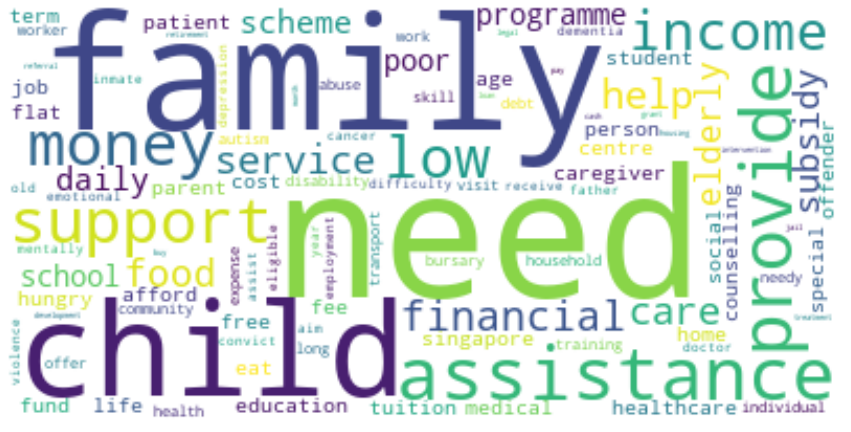

In [9]:
#Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(Description_to_match)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
#build word dictionary

from gensim import corpora

#creating term dictionary
%time dictionary = corpora.Dictionary(Description_to_match)

#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#NOTE: Since we have smaller dataset, we will keep this commented for now.

#dictionary.filter_extremes(no_below=4, no_above=0.2)

#list of few which which can be further removed
stoplist = set('hello and if this can would should could tell ask come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dictionary.save('dictionary')

Wall time: 22.9 ms


In [11]:
#print top 50 items from the dictionary with their unique token-id
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['anymore', 0], ['burnout', 1], ['caregiver', 2], ['cope', 3], ['elderly', 4], ['feel', 5], ['generation', 6], ['health', 7], ['issue', 8], ['mental', 9], ['overwhelmed', 10], ['parent', 11], ['person', 12], ['provide', 13], ['sandwich', 14], ['stress', 15], ['training', 16], ['support', 17], ['addition', 18], ['advance', 19], ['assessment', 20], ['benefit', 21], ['carry', 22], ['change', 23], ['child', 24], ['childcare', 25], ['chore', 26], ['condition', 27], ['day', 28], ['dire', 29], ['eat', 30], ['ensure', 31], ['family', 32], ['familyí', 33], ['food', 34], ['help', 35], ['household', 36], ['households', 37], ['hungry', 38], ['identify', 39], ['improvement', 40], ['life', 41], ['meal', 42], ['meet', 43], ['money', 44], ['monitor', 45], ['month', 46], ['need', 47], ['opportunity', 48], ['periodic', 49], ['programme', 50]]]


In [12]:
#Bag of words
corpus = [dictionary.doc2bow(desc) for desc in Description_to_match]
word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]
print(word_frequencies)

[[('anymore', 1), ('burnout', 1), ('caregiver', 2), ('cope', 1), ('elderly', 1), ('feel', 1), ('generation', 1), ('health', 1), ('issue', 1), ('mental', 1), ('overwhelmed', 1), ('parent', 1), ('person', 1), ('provide', 1), ('sandwich', 1), ('stress', 1), ('training', 1)], [('anymore', 1), ('burnout', 1), ('caregiver', 2), ('cope', 1), ('elderly', 1), ('feel', 1), ('generation', 1), ('health', 1), ('issue', 1), ('mental', 1), ('overwhelmed', 1), ('parent', 1), ('person', 1), ('provide', 1), ('sandwich', 1), ('stress', 1), ('support', 1)], [('elderly', 1), ('provide', 1), ('support', 1), ('addition', 1), ('advance', 1), ('assessment', 1), ('benefit', 1), ('carry', 1), ('change', 1), ('child', 3), ('childcare', 1), ('chore', 2), ('condition', 1), ('day', 1), ('dire', 1), ('eat', 1), ('ensure', 1), ('family', 1), ('familyí', 1), ('food', 2), ('help', 3), ('household', 3), ('households', 1), ('hungry', 1), ('identify', 1), ('improvement', 1), ('life', 1), ('meal', 1), ('meet', 1), ('money',

In [13]:
#TF IDF and LSI
%time schemes_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
schemes_tfidf_model.save("tfidf.model")
%time schemes_lsi_model = gensim.models.LsiModel(schemes_tfidf_model[corpus], id2word=dictionary, num_topics=300)
schemes_lsi_model.save("lsi.model")

Wall time: 4.99 ms
Wall time: 550 ms


In [14]:
%time gensim.corpora.MmCorpus.serialize('schemes_tfidf_model_mm', schemes_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('schemes_lsi_model_mm',schemes_lsi_model[schemes_tfidf_model[corpus]])

Wall time: 59.8 ms
Wall time: 139 ms


In [15]:
#Load indexed corpus
schemes_tfidf_corpus = gensim.corpora.MmCorpus('schemes_tfidf_model_mm')
schemes_lsi_corpus = gensim.corpora.MmCorpus('schemes_lsi_model_mm')

print(schemes_tfidf_corpus)
print(schemes_lsi_corpus)

MmCorpus(186 documents, 1466 features, 4729 non-zero entries)
MmCorpus(186 documents, 186 features, 34230 non-zero entries)


In [16]:
from gensim.similarities import MatrixSimilarity

%time schemes_index = MatrixSimilarity(schemes_lsi_corpus, num_features = schemes_lsi_corpus.num_terms)

Wall time: 85.8 ms


In [19]:
#Search similarity

from operator import itemgetter

def search_similar_schemes(search_term):
    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = schemes_tfidf_model[query_bow]
    query_lsi = schemes_lsi_model[query_tfidf]

    schemes_index.num_best = 50

    schemes_list = schemes_index[query_lsi]

    schemes_list.sort(key=itemgetter(1), reverse=True)
    schemes_names = []

    for j, scheme in enumerate(schemes_list):

        schemes_names.append (
            {
                'Relevance': round((scheme[1] * 100),2),
                'Scheme Title': df_schemes['Scheme'][scheme[0]],
                'Description': df_schemes['Description'][scheme[0]]
            }

        )
        if j == (schemes_index.num_best-1):
            break

    return pd.DataFrame(schemes_names, columns=['Relevance','Scheme Title','Description'])

In [20]:
search_similar_schemes('pregnant teen')

,Relevance,Scheme Title,Description
0,78.56,HCSA Dayspring SPIN,SPIN empowers single parents to make informed ...
1,61.96,Pregnancy Crisis and Support,"For emotional support, guidance, help and refe..."
2,53.00,Babes - A Helping Hand for Pregnant Teens,Staff will discuss the various options availab...
3,31.48,Information,"Information on various issues, including contr..."
4,0.00,e2i - Employment and Employability Institute,e2i is the empowering network for workers and ...
5,0.00,Enable IT Programme,The Enable IT Programme aims to build an inclu...
6,0.00,Mobile Access for Seniors,Mobile Access for Seniors is a scheme that sup...
7,0.00,Various services,Network for people with dementia and depressio...
8,0.00,SINDA Job Care Scheme,SINDAís Job Care Scheme (SINDA JCS) is to assi...
9,0.00,Ulu Pandan Stars,The programme collaborates with youth voluntee...


In [ ]:
import flask
print(flask.__version__)